In [1]:
# Import libraries needed
import csv
import sqlite3
import json
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, Column, Integer, String, Date, text
from sqlalchemy.orm import sessionmaker
from sqlalchemy.ext.declarative import declarative_base
from datetime import datetime


In [2]:
# def create_database_and_import_csv(database_name, table_name, csv_file):
#     # Read the CSV file to infer column types and names
#     df = pd.read_csv(csv_file, nrows=1)

#     # Connect to SQLite database
#     conn = sqlite3.connect(database_name)
#     cursor = conn.cursor()

#     # Create a table in the database based on CSV data types
#     create_table_query = f'''
#         CREATE TABLE {table_name} (
#             {', '.join(['{} {}'.format(column, df[column].dtype) for column in df.columns])}
#         )
#     '''
#     cursor.execute(create_table_query)

#     # Import CSV data into the table
#     df.to_sql(table_name, conn, if_exists='replace', index=False)

#     # Commit the changes and close the connection
#     conn.commit()
#     conn.close()



In [3]:
# # Create SQLite Database, Table, and Import CSV Data

# database_name = 'drug_side_effects.db'
# table_name = 'drug_table'
# csv_file = 'Data/drugs_side_effects_drugs_com.csv'


# create_database_and_import_csv(database_name, table_name, csv_file)


In [4]:
# def plot_bar_graph(database_name, table_name, column_to_plot):
#     # Connect to SQLite database
#     conn = sqlite3.connect(database_name)

#     # Query data from the database into a DataFrame
#     query = f'SELECT * FROM {table_name}'
#     df = pd.read_sql_query(query, conn)

#     # Close the database connection
#     conn.close()

#     # Plot a bar graph
#     plt.figure(figsize=(10, 6))
#     df[column_to_plot].value_counts().plot(kind='bar', color='skyblue')
#     plt.title(f'Bar Graph of {column_to_plot}')
#     plt.xlabel(column_to_plot)
#     plt.ylabel('Count')
#     plt.show()


# # Plot a bar graph based on a specific column
# column_to_plot = 'column_name'  # Replace with the actual column name you want to plot
# plot_bar_graph(database_name, table_name, column_to_plot)

In [5]:
df = pd.read_csv("Data/drugs_side_effects_drugs_com.csv")
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [6]:
# df.info()

In [7]:
df = df.drop(['no_of_reviews', 'drug_link','medical_condition_url',"related_drugs"], axis = 1)
df.shape

(2931, 13)

Rx        1998
Rx/OTC     604
OTC        328
Name: rx_otc, dtype: int64

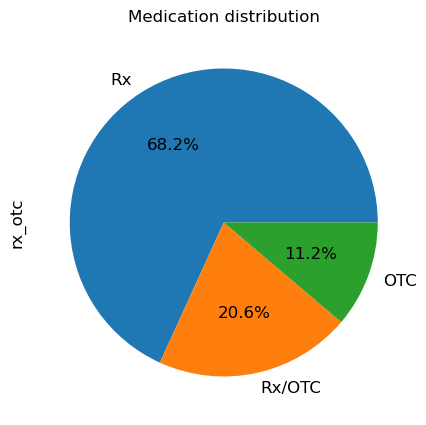

In [12]:
# Pie Plot

#figure size
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(5,5))

df['rx_otc'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Medication distribution")

df['rx_otc'].value_counts()

In [9]:
#Pie Plot
# df['medical_condition'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on medical_condition")
top10_medicalCondition_df = df['medical_condition'].value_counts().head(10)
top10_medicalCondition_df

Pain                 264
Colds & Flu          245
Acne                 238
Hypertension         177
Osteoarthritis       129
Hayfever             124
Eczema               122
AIDS/HIV             109
Diabetes (Type 2)    104
Psoriasis             93
Name: medical_condition, dtype: int64

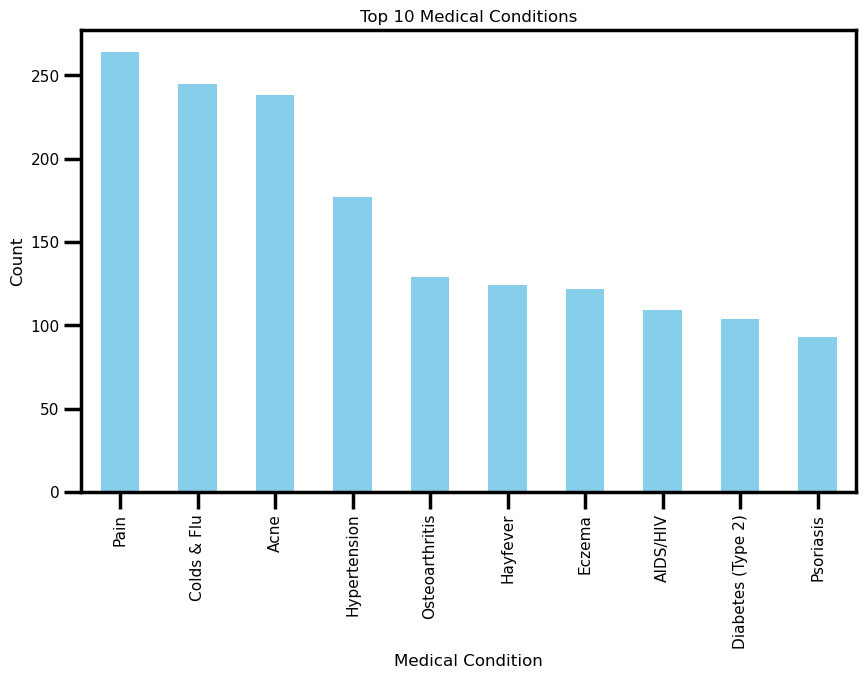

In [10]:
plt.figure(figsize=(10, 6))
top10_medicalCondition_df.plot(kind='bar', color='skyblue')
plt.title('Top 10 Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.show()

In [ ]:
def download_images_from_s3(bucket_name, prefix, local_directory):
    conf = SparkConf().setAppName("S3ImageDownloader")
    sc = SparkContext(conf=conf)
    spark = SparkSession(sc)

    # Function to download a single file from S3
    def download_file_from_s3(key):
        local_path = os.path.join(local_directory, os.path.relpath(key, prefix))
        os.makedirs(os.path.dirname(local_path), exist_ok=True)
        s3.download_file(bucket_name, key, local_path)

    # List objects from S3
    response = s3.list_objects_v2(Bucket=bucket_name, Prefix=prefix)
    keys = [obj['Key'] for obj in response.get('Contents', [])]

    # Create an RDD from the list of keys
    keys_rdd = sc.parallelize(keys)

    # Use Spark's map operation to parallelize the file downloads
    keys_rdd.foreach(download_file_from_s3)

    # Stop SparkContext
    sc.stop()